# Module 7: Generalization Performance 

* Consider the fit of the following three models (red lines) to the blue circles

![alt text](figures/gen_training.jpg)

* The middle model has the smallest MSE and it looks to be the most complex

* But, look at what happens when we measure MSE on data points the models have not been trained on:

![alt text](figures/gen_testing.jpg)

* The most complex model has the worst MSE on unseen data, despite having the best MSE on the training data

* We say that the model has _overfitted_ to the training dataset: it mistook noise for an actual signal.

* This is why we _must_ evaluate our models on data the model has not been trained on

## Tracking Training and Testing Performance

* Before we do that, lets see how our neural network models can overfit. 

* We'll take this opportuntiy to introduce a high-level framework called Keras. Keras sits on top of tensorflow and makes building, training, and running common neural networks much easier.

* We'll withhold 20% of the data for testing and plot how the loss on training and testing changes over time.


In [1]:
# necessary imports
import numpy as np
import numpy.random as rng 
import tensorflow as tf
import matplotlib.pyplot as plt 
import sklearn.metrics
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from tensorflow.keras.utils import to_categorical
import scipy.stats

In [83]:
data = np.load('data/multiclass_classification_hard.npz')
X, y = data['X'], data['y']


In [84]:
n_train_prop = 0.8

# shuffle order of data indecies
ix = rng.permutation(X.shape[0])

# compute training and testing sizes
n_train = int(n_train_prop * X.shape[0])
n_test = X.shape[0] - n_train

# grab the relavent shuffled indecies
train_ix = ix[:n_train]
test_ix = ix[n_train:]

# one hot encoding of outputs
y = to_categorical(y)

# finally, construct the training, and testing sets
Xtrain, ytrain = X[train_ix, :], y[train_ix]
Xtest, ytest = X[test_ix, :], y[test_ix]

print("Training set: %d" % Xtrain.shape[0])
print("Testing set: %d" % Xtest.shape[0])

Training set: 800
Testing set: 200


In [127]:
# number of hidden units
n_hidden = 50

# notice that we don't specify the first dimension in the input 
# shape, Keras infers that automatically
# the trailing comma is important! don't forget it
input_node = layers.Input(shape=(X.shape[1],))
hidden_layer = layers.Dense(n_hidden, activation='relu')(input_node)
output_node = layers.Dense(y.shape[1], activation='softmax')(hidden_layer)
model = keras.models.Model(inputs=input_node, outputs=output_node)
model.compile('sgd', 'categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "functional_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 12)]              0         
_________________________________________________________________
dense_56 (Dense)             (None, 50)                650       
_________________________________________________________________
dense_57 (Dense)             (None, 6)                 306       
Total params: 956
Trainable params: 956
Non-trainable params: 0
_________________________________________________________________
None


In [128]:
# train the model
h = model.fit(x = Xtrain, y=ytrain, verbose=True, validation_data=(Xtest, ytest), epochs=200, batch_size=5)

Epoch 1/200
160/160 [==============================] - 0s 1ms/step - loss: 0.8646 - acc: 0.6662 - val_loss: 0.5614 - val_acc: 0.7950
Epoch 2/200
160/160 [==============================] - 0s 636us/step - loss: 0.4502 - acc: 0.8250 - val_loss: 0.4377 - val_acc: 0.8300
Epoch 3/200
160/160 [==============================] - 0s 656us/step - loss: 0.3611 - acc: 0.8675 - val_loss: 0.3807 - val_acc: 0.8750
Epoch 4/200
160/160 [==============================] - 0s 656us/step - loss: 0.3164 - acc: 0.8863 - val_loss: 0.3554 - val_acc: 0.8800
Epoch 5/200
160/160 [==============================] - 0s 632us/step - loss: 0.2909 - acc: 0.8975 - val_loss: 0.3399 - val_acc: 0.9000
Epoch 6/200
160/160 [==============================] - 0s 675us/step - loss: 0.2666 - acc: 0.9125 - val_loss: 0.3524 - val_acc: 0.8800
Epoch 7/200
160/160 [==============================] - 0s 649us/step - loss: 0.2532 - acc: 0.9175 - val_loss: 0.3135 - val_acc: 0.9100
Epoch 8/200
160/160 [==============================] - 0s

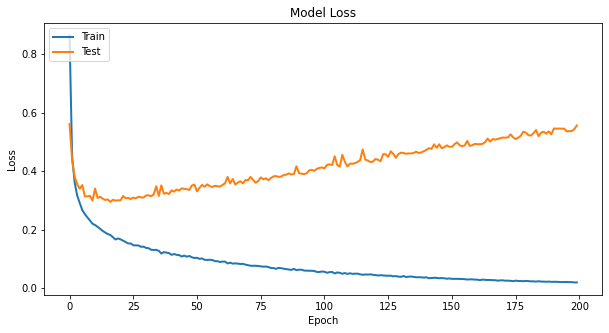

In [130]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(h.history['loss'], linewidth=2)
ax.plot(h.history['val_loss'], linewidth=2)
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper left')

* Notice how, initially, both training and testing losses decrease but then as the training loss continues decreasing, the testing loss starts increasing!

(0.8, 1.0)

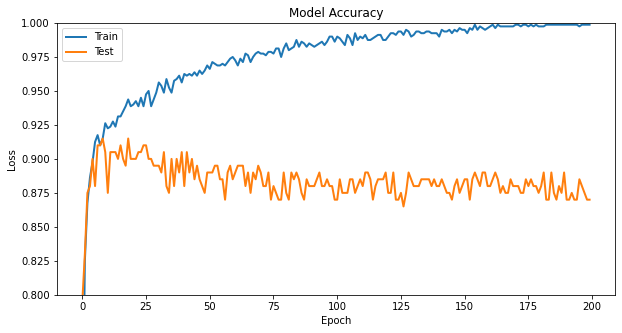

In [131]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(h.history['acc'], linewidth=2)
ax.plot(h.history['val_acc'], linewidth=2)
ax.set_title('Model Accuracy')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper left')
ax.set_ylim([0.8, 1.0])

## Fighting Overfitting: Dropout

* With dropout, neurons are randomly "turned-off" with some probability $p$.
* The theory behind dropout is that it encourages neurons to specialize and not rely on other neurons
* Special care has to be taken when using dropout because it changes the expected value of the output of the neurons
* Fortunately, Keras takes care of this detail for us
* Let's add dropout to our earlier example

In [132]:
# number of hidden units
n_hidden = 50
dropout_p = 0.5

input_node = layers.Input(shape=(X.shape[1],))
hidden_layer = layers.Dense(n_hidden, activation='relu')(input_node)
hidden_layer = layers.Dropout(rate=dropout_p)(hidden_layer)
output_node = layers.Dense(y.shape[1], activation='softmax')(hidden_layer)
model = keras.models.Model(inputs=input_node, outputs=output_node)
model.compile('sgd', 'categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "functional_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 12)]              0         
_________________________________________________________________
dense_58 (Dense)             (None, 50)                650       
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 6)                 306       
Total params: 956
Trainable params: 956
Non-trainable params: 0
_________________________________________________________________
None


In [133]:
# train the model
h = model.fit(x = Xtrain, y=ytrain, verbose=True, validation_data=(Xtest, ytest), epochs=200, batch_size=5)

Epoch 1/200
160/160 [==============================] - 0s 1ms/step - loss: 1.3536 - acc: 0.5200 - val_loss: 0.5585 - val_acc: 0.7700
Epoch 2/200
160/160 [==============================] - 0s 665us/step - loss: 0.7221 - acc: 0.7050 - val_loss: 0.4378 - val_acc: 0.8700
Epoch 3/200
160/160 [==============================] - 0s 672us/step - loss: 0.6252 - acc: 0.7550 - val_loss: 0.4203 - val_acc: 0.8700
Epoch 4/200
160/160 [==============================] - 0s 632us/step - loss: 0.5523 - acc: 0.7650 - val_loss: 0.3768 - val_acc: 0.8950
Epoch 5/200
160/160 [==============================] - 0s 631us/step - loss: 0.4988 - acc: 0.8112 - val_loss: 0.3560 - val_acc: 0.9050
Epoch 6/200
160/160 [==============================] - 0s 651us/step - loss: 0.4787 - acc: 0.8275 - val_loss: 0.3545 - val_acc: 0.8850
Epoch 7/200
160/160 [==============================] - 0s 636us/step - loss: 0.4734 - acc: 0.7925 - val_loss: 0.3465 - val_acc: 0.9000
Epoch 8/200
160/160 [==============================] - 0s

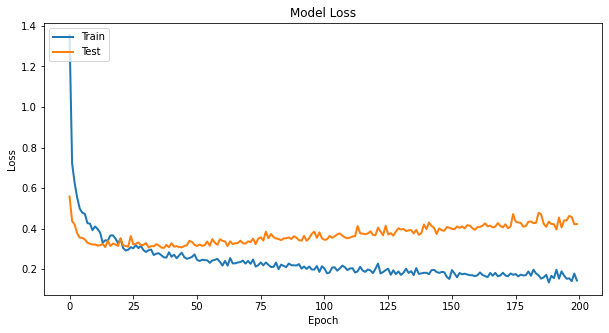

In [134]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(h.history['loss'], linewidth=2)
ax.plot(h.history['val_loss'], linewidth=2)
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper left')

(0.8, 1.0)

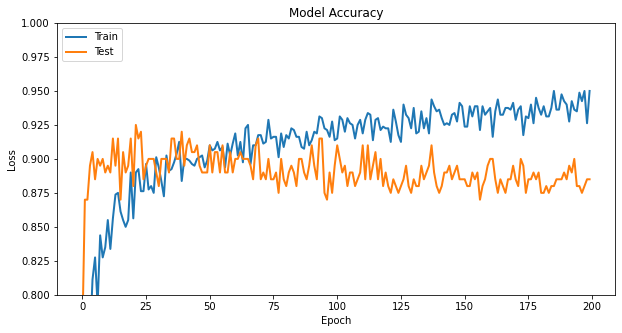

In [135]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(h.history['acc'], linewidth=2)
ax.plot(h.history['val_acc'], linewidth=2)
ax.set_title('Model Accuracy')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper left')
ax.set_ylim([0.8, 1.0])

## Fighting Overfitting: Regularization

* An extra term is a added to the loss function to penalize network weights that are too large. For example, the common L2 regularization scheme adds a summation of all network weights squared:

$$\mathcal{L}(\hat{y}_{i},y_{i})=\mathcal{L}_{MSE}(\hat{y}_{i},y_{i})+0.5\lambda\sum_{j}w_{j}^{2}$$

* L2 regularization encourages diffuse weight vectors and discourages vectors with large individual weights

* The regularization parameter $\lambda$ has to be determined ahead of time

In [136]:
import tensorflow.keras.regularizers as reg 

# number of hidden units
n_hidden = 50

# L2 regularization penalty term, try different values [0.001, 0.01, 0.1, 1.]
l2_penalty = 0.05


# notice that we don't specify the first dimension in the input 
# shape, Keras infers that automatically
# the trailing comma is important! don't forget it
input_node = layers.Input(shape=(X.shape[1],))
hidden_layer = layers.Dense(n_hidden, activation='relu', kernel_regularizer=reg.l2(l2_penalty))(input_node)
output_node = layers.Dense(y.shape[1], activation='softmax', kernel_regularizer=reg.l2(l2_penalty))(hidden_layer)
model = keras.models.Model(inputs=input_node, outputs=output_node)
model.compile('sgd', 'categorical_crossentropy', metrics=['acc'])
print(model.summary())


Model: "functional_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 12)]              0         
_________________________________________________________________
dense_60 (Dense)             (None, 50)                650       
_________________________________________________________________
dense_61 (Dense)             (None, 6)                 306       
Total params: 956
Trainable params: 956
Non-trainable params: 0
_________________________________________________________________
None


In [137]:
# train the model
h = model.fit(x = Xtrain, y=ytrain, verbose=False, validation_data=(Xtest,ytest), epochs=200, batch_size=5)

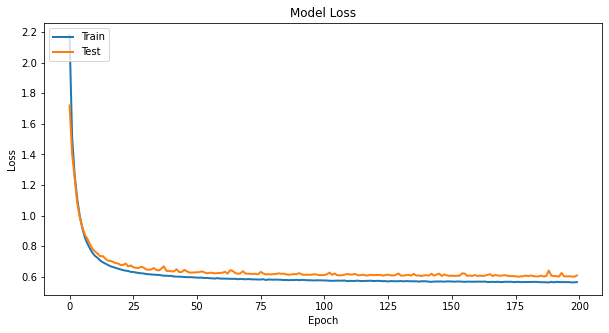

In [138]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(h.history['loss'], linewidth=2)
ax.plot(h.history['val_loss'], linewidth=2)
ax.set_title('Model Loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper left')

0.8949999809265137


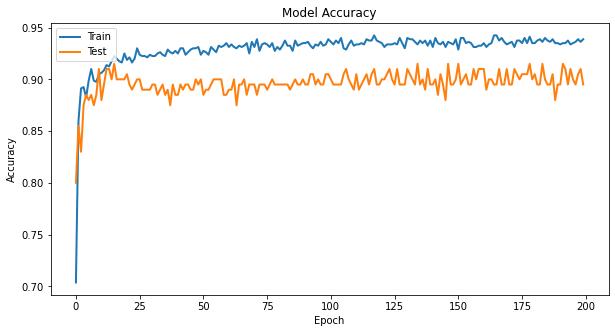

In [139]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(h.history['acc'], linewidth=2)
ax.plot(h.history['val_acc'], linewidth=2)
ax.set_title('Model Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='upper left')
print(h.history['val_acc'][-1])

### Exercises

- Try different dropout rates
- Try different regularization strengths, what happens when use a large value for $\lambda$?

## Fighting Overfitting: Early-Stopping

* Why don't we just run the model, and pick the point at which the test loss stops decreasing?

* That's a huge ***NO NO***. By doing so, you are implicitly training on the test set, even though you are not applying gradient descent directly to it.

* But, this does provide us with an idea: what if we split the training set further into a _real_ training set and a validation set.

* We train the model on the real training set and monitor the loss on the validation set. And pick the model with the lowest validation error.

* To do this with Keras, we use the concept of _callbacks_. 

* A callback is a function that gets called at the end of every epoch.

* We need two callbacks: one to stop training when the validation loss starts increasing, and one to save the model parameter at that point.

In [140]:
import tensorflow.keras.callbacks

In [141]:
# the patience parameter tells keras to stop training if validation loss doesn't decrease after 10 consecutive epochs
# restore_best_weight tells keras to use the weights that produced the least error
callbacks = [
    tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

In [144]:
n_valid_prop = 0.2

ix = rng.permutation(Xtrain.shape[0])

n_valid = int(n_valid_prop * Xtrain.shape[0])
n_train = Xtrain.shape[0] - n_valid

# grab the relavent shuffled indecies
valid_ix = ix[:n_valid]
train_ix = ix[n_valid:]

# finally, construct the training, validation, and testing sets
Xtrain_real, ytrain_real = Xtrain[train_ix, :], ytrain[train_ix]
Xvalid, yvalid = Xtrain[valid_ix, :], ytrain[valid_ix]

print(Xtrain_real.shape)
print(Xvalid.shape)
print(Xtest.shape)

(640, 12)
(160, 12)
(200, 12)


In [147]:
# number of hidden units
n_hidden = 50

# build model
input_node = layers.Input(shape=(X.shape[1],))
hidden_layer = layers.Dense(n_hidden, activation='relu')(input_node)
output_node = layers.Dense(y.shape[1], activation='softmax')(hidden_layer)
model = keras.models.Model(inputs=input_node, outputs=output_node)
model.compile('sgd', 'categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "functional_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 12)]              0         
_________________________________________________________________
dense_64 (Dense)             (None, 50)                650       
_________________________________________________________________
dense_65 (Dense)             (None, 6)                 306       
Total params: 956
Trainable params: 956
Non-trainable params: 0
_________________________________________________________________
None


In [148]:
model.fit(
        x=Xtrain_real,
        y=ytrain_real,
        batch_size=5,
        epochs=200,
        verbose=True,
        validation_data=(Xvalid, yvalid),
        callbacks=callbacks)

Epoch 1/200
128/128 [==============================] - 0s 1ms/step - loss: 1.1402 - acc: 0.5953 - val_loss: 0.6124 - val_acc: 0.7937
Epoch 2/200
128/128 [==============================] - 0s 700us/step - loss: 0.5389 - acc: 0.8141 - val_loss: 0.4405 - val_acc: 0.8562
Epoch 3/200
128/128 [==============================] - 0s 666us/step - loss: 0.4084 - acc: 0.8672 - val_loss: 0.3977 - val_acc: 0.8875
Epoch 4/200
128/128 [==============================] - 0s 667us/step - loss: 0.3602 - acc: 0.8828 - val_loss: 0.3502 - val_acc: 0.9000
Epoch 5/200
128/128 [==============================] - 0s 680us/step - loss: 0.3199 - acc: 0.8906 - val_loss: 0.3110 - val_acc: 0.9062
Epoch 6/200
128/128 [==============================] - 0s 653us/step - loss: 0.2930 - acc: 0.9109 - val_loss: 0.3002 - val_acc: 0.9000
Epoch 7/200
128/128 [==============================] - 0s 683us/step - loss: 0.2762 - acc: 0.9000 - val_loss: 0.2967 - val_acc: 0.8750
Epoch 8/200
128/128 [==============================] - 0s

In [149]:
preds = model.predict(Xtest)

acc = sklearn.metrics.accuracy_score(np.argmax(ytest, axis=1), np.argmax(preds, 1))
print("Accuracy: %0.2f" % acc)

Accuracy: 0.88
